In [ ]:
 # Libraries and pre-settings
import pandas as pd
import numpy as np
import yfinance as yf
import ta
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing the dataset
ticker = 'QQQ'
df = yf.download(ticker)
df = df.xs(ticker, level='Ticker', axis=1)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Features
mfi = ta.volume.MFIIndicator(df['High'], df['Low'], df['Close'], df['Volume'], window=2)
df['MFI'] = mfi.money_flow_index()
df.dropna(axis=0, inplace=True)

In [ ]:
# Trading rules
df['Entry_signal'] = np.nan
df['Exit_signal'] = np.nan

df['numeric_index'] = range(len(df))

aux=0
entry_day=0

for i in range(len(df['MFI'])):
  if aux==0 and df.iloc[i]['MFI']<10:
    df.iloc[i, df.columns.get_loc('Entry_signal')] = 1
    aux=1
    dia_entrada=df.iloc[i]['numeric_index']
  if aux == 1 and (df.iloc[i]['Close'] > df.iloc[i-1]['High']):
    df.iloc[i, df.columns.get_loc('Exit_signal')] = 1
    aux = 0
  if aux == 1 and (df.iloc[i]['numeric_index'] - entry_day) == 10:
    df.iloc[i, df.columns.get_loc('Exit_signal')] = 1
    aux = 0

In [ ]:
# Filtering only the signals to calculate returns
df = df.dropna(subset = ['Entry_signal', 'Exit_signal'], axis=0, how='all')

# Checking if there is no open trade without closing
if df['Entry_signal'].sum() > df['Exit_signal'].sum():
    df.drop(df.index[-1], inplace=True)

In [ ]:
# Calculating trade returns
df['Trade'] = df['Close'].pct_change(1)
df['Acc_trade'] = df['Trade'].cumsum() * 100

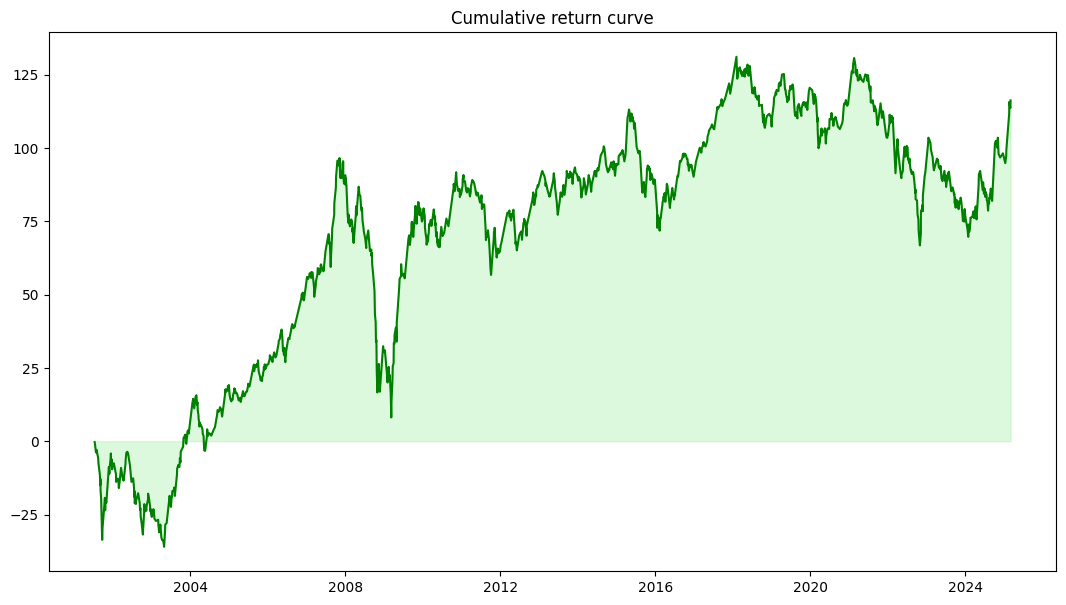

In [ ]:
# Plotting the cumulative return curve
plt.figure(figsize=(13,7))
plt.plot(df['Acc_trade'], color='green')
plt.fill_between(df.index, df['Acc_trade'], alpha=0.3, color='lightgreen')
plt.title('Cumulative return curve')
plt.show()